# Explore Municipality Dataset

This notebook is used to explore the `rivm-covid-19-municipality.csv` dataset. It contains various graph that visualize the data in the dataset.

In [1]:
import pandas as pd

## Load dataset

In [2]:
df = pd.read_csv("../data/processed/rivm-covid-19-municipality.csv")

In [3]:
df.loc[df["Gemeentecode"] == -1, "Gemeente"] = "Onbekend"
df.loc[df["Provinciecode"] == -1, "Provincie"] = "Onbekend"

In [4]:
df["Gemeentecode"] = df["Gemeentecode"].astype(int)
df["PositiefGetest"] = df["PositiefGetest"].astype(int)
df["Gemeente"] = df["Gemeente"].astype(str)
df["Provinciecode"] = df["Provinciecode"].astype(int)
df["Provincie"] = df["Provincie"].astype(str)
df["Datum"] = pd.to_datetime(df["Datum"])

In [5]:
df["PositiefGetestCumulatief"] = df.groupby(["Gemeentecode"])["PositiefGetest"].cumsum(axis=0)

## Inspect dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101863 entries, 0 to 101862
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Gemeentecode              101863 non-null  int64         
 1   PositiefGetest            101863 non-null  int64         
 2   Gemeente                  101863 non-null  object        
 3   Provinciecode             101863 non-null  int64         
 4   Provincie                 101863 non-null  object        
 5   Datum                     101863 non-null  datetime64[ns]
 6   PositiefGetestCumulatief  101863 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 5.4+ MB


In [7]:
df.head()

,Gemeentecode,PositiefGetest,Gemeente,Provinciecode,Provincie,Datum,PositiefGetestCumulatief
0,809,1,Loon op Zand,30,Noord-Brabant,2020-02-28,1
1,363,1,Amsterdam,27,Noord-Holland,2020-02-29,1
2,809,1,Loon op Zand,30,Noord-Brabant,2020-03-01,2
3,855,2,Tilburg,30,Noord-Brabant,2020-03-01,2
4,363,1,Amsterdam,27,Noord-Holland,2020-03-02,2


In [8]:
df.tail()

,Gemeentecode,PositiefGetest,Gemeente,Provinciecode,Provincie,Datum,PositiefGetestCumulatief
101858,1966,7,Het Hogeland,20,Groningen,2021-05-02,2724
101859,1969,15,Westerkwartier,20,Groningen,2021-05-02,2960
101860,1970,1,Noardeast-Fryslân,21,Friesland,2021-05-02,2978
101861,1978,40,Molenlanden,28,Zuid-Holland,2021-05-02,5138
101862,1979,7,Eemsdelta,20,Groningen,2021-05-02,2616


## Visualize top 5 cases per day

In [9]:
df_municipalities = df.groupby(["Gemeentecode", "Datum"], as_index=False).agg({
    "PositiefGetest": "mean",
    "Gemeente": "first",
})
df_municipalities = df_municipalities.pivot(index="Datum", columns="Gemeente", values="PositiefGetest")
df_municipalities = df_municipalities[df_municipalities.sum(axis=0).sort_values(ascending=False).head(5).index]
df_municipalities = df_municipalities.fillna(method="ffill")

<AxesSubplot:xlabel='Datum'>

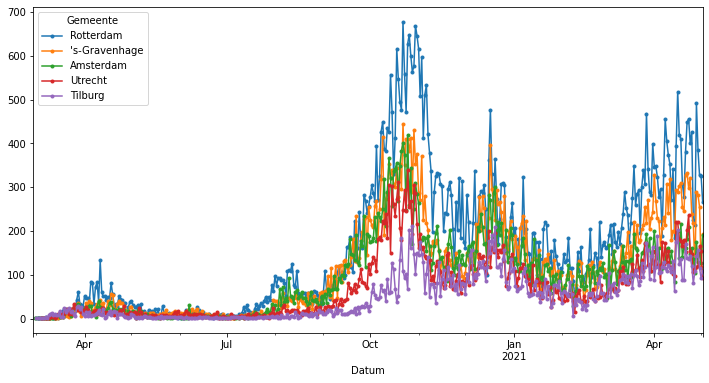

In [10]:
df_municipalities.plot(
    figsize=(12,6),
    style=".-",
)

## Visualize top 5 cumulative per day

In [11]:
df_municipalities = df.groupby(["Gemeentecode", "Datum"], as_index=False).agg({
    "PositiefGetestCumulatief": "mean",
    "Gemeente": "first",
})
df_municipalities = df_municipalities.pivot(index="Datum", columns="Gemeente", values="PositiefGetestCumulatief")
df_municipalities = df_municipalities[df_municipalities.sum(axis=0).sort_values(ascending=False).head(5).index]
df_municipalities = df_municipalities.fillna(method="ffill")

<AxesSubplot:xlabel='Datum'>

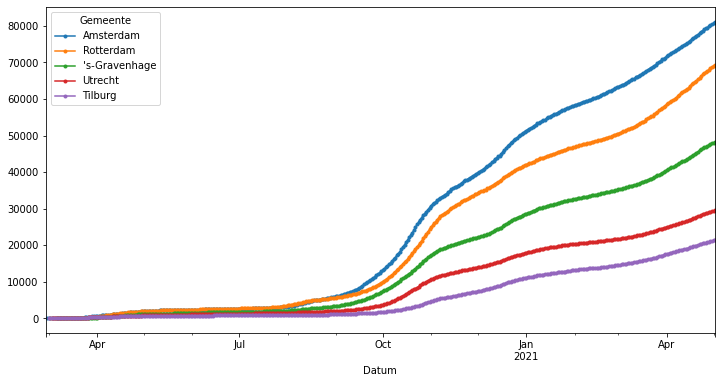

In [12]:
df_municipalities.plot(
    figsize=(12,6),
    style=".-",
)

## Visualize bottom 5 cases per day

In [13]:
df_municipalities = df.groupby(["Gemeentecode", "Datum"], as_index=False).agg({
    "PositiefGetest": "mean",
    "Gemeente": "first",
})
df_municipalities = df_municipalities.pivot(index="Datum", columns="Gemeente", values="PositiefGetest")
df_municipalities = df_municipalities[df_municipalities.sum(axis=0).sort_values(ascending=True).head(5).index]
df_municipalities = df_municipalities.fillna(method="ffill")

<AxesSubplot:xlabel='Datum'>

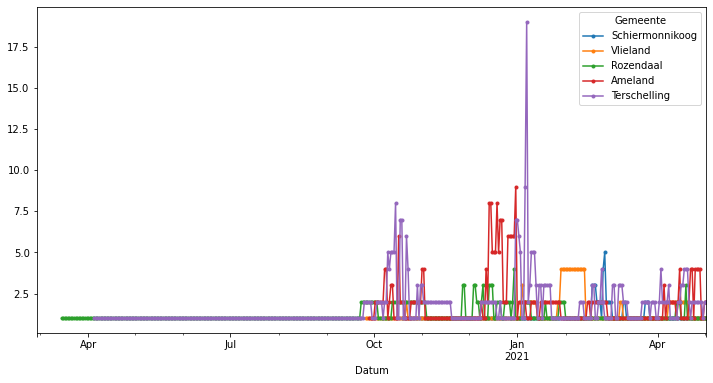

In [14]:
df_municipalities.plot(
    figsize=(12,6),
    style=".-",
)

## Visualize bottom 5 cumulative per day

In [15]:
df_municipalities = df.groupby(["Gemeentecode", "Datum"], as_index=False).agg({
    "PositiefGetestCumulatief": "sum",
    "Gemeente": "first",
})
df_municipalities = df_municipalities.pivot(index="Datum", columns="Gemeente", values="PositiefGetestCumulatief")
df_municipalities = df_municipalities[df_municipalities.sum(axis=0).sort_values(ascending=True).head(5).index]
df_municipalities = df_municipalities.fillna(method="ffill")

<AxesSubplot:xlabel='Datum'>

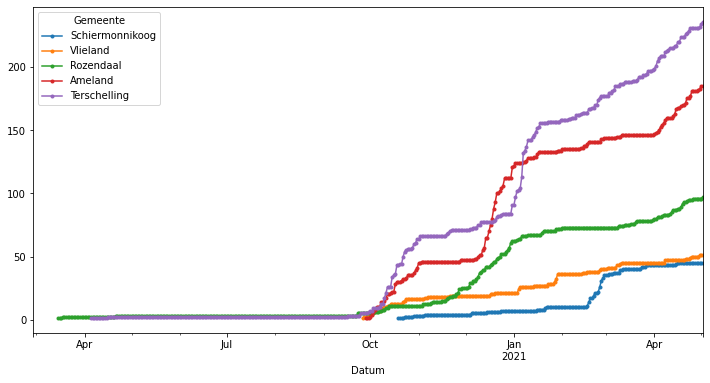

In [16]:
df_municipalities.plot(
    figsize=(12,6),
    style=".-",
)

## Visualize cases per day

In [17]:
df_provinces = df.groupby(["Provinciecode", "Datum"], as_index=False).agg({
    "PositiefGetest": "sum",
    "Provincie": "first",
})
df_provinces = df_provinces.pivot(index="Datum", columns="Provincie", values="PositiefGetest")

<AxesSubplot:xlabel='Datum'>

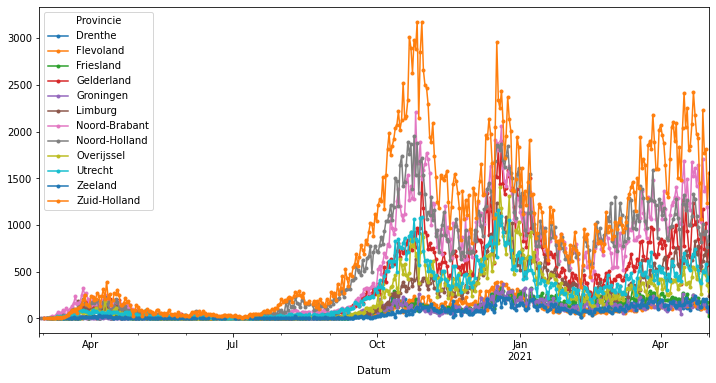

In [18]:
df_provinces.plot(
    figsize=(12,6),
    style=".-",
)

## Visualize cumulative per day

In [19]:
df_provinces = df.groupby(["Provinciecode", "Datum"], as_index=False).agg({
    "PositiefGetestCumulatief": "sum",
    "Provincie": "first",
})
df_provinces = df_provinces.pivot(index="Datum", columns="Provincie", values="PositiefGetestCumulatief")

<AxesSubplot:xlabel='Datum'>

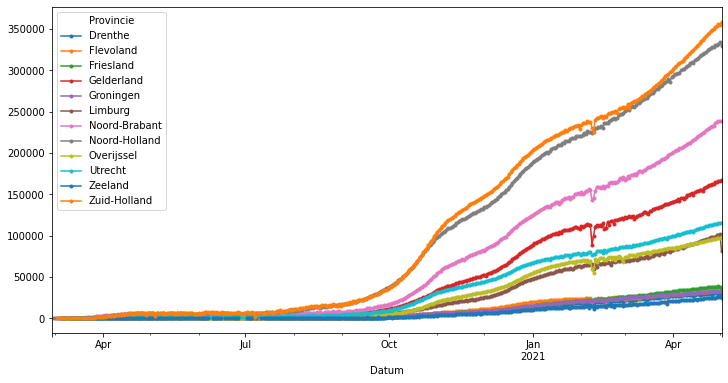

In [20]:
df_provinces.plot(
    figsize=(12,6),
    style=".-",
)

## Visualize total

In [21]:
df_provinces = df.groupby(["Provinciecode"], as_index=False).agg({
    "PositiefGetest": "sum",
    "Provincie": "first",
})

<AxesSubplot:xlabel='Provincie'>

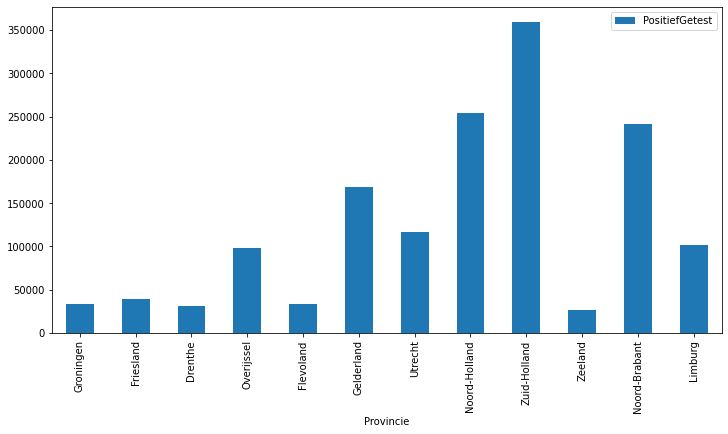

In [22]:
df_provinces.plot(
    x="Provincie",
    y=["PositiefGetest"],
    kind="bar",
    figsize=(12,6),
    style=".-",
)